In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
mpl.rc('font', family='Malgun Gothic')

# 제조 공정 데이터 분석

In [5]:
df1 = pd.read_csv('07_Data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메세지     2792 non-null   object 
 1   발생시간    2792 non-null   object 
 2   조치시간    2792 non-null   object 
 3   정지시간    2792 non-null   object 
 4   정지시간2   2792 non-null   float64
 5   모델      1112 non-null   object 
 6   제품두께    1112 non-null   object 
 7   제품싸이즈   1112 non-null   object 
 8   작업구분    2792 non-null   object 
 9   작업자     1112 non-null   object 
 10  온도      2792 non-null   float64
 11  습도      2792 non-null   float64
dtypes: float64(3), object(9)
memory usage: 261.9+ KB


In [6]:
df1

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2787,메가진 Full,2015-06-24T12:24:04,2015-06-24T12:28:17,0시 04분 13초,252.560,NaN,NaN,NaN,주간,NaN,22.5,47.3
2788,Door Open,2015-06-24T12:54:42,2015-06-24T12:55:08,0시 00분 26초,25.956,NaN,NaN,NaN,주간,NaN,22.5,47.3
2789,메가진 Full,2015-06-24T12:55:08,2015-06-24T12:55:16,0시 00분 08초,8.063,NaN,NaN,NaN,주간,NaN,22.5,47.3
2790,롯트 종료,2015-06-24T12:55:16,2015-06-24T12:55:20,0시 00분 04초,4.281,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [9]:
df1['제품두께'].unique()

array(['0.25', '1.25', '2.25', '3.25', '4.25', '5.25', '6.25', '7.25',
       '8.25', '9.25', '10.25', '11.25', '12.25', '13.25', '14.25',
       '15.25', '16.25', nan, '0.13', '1.13', '2.13', '3.13', '4.13',
       '5.13', '6.13', '7.13', '8.13', '9.13', '10.13', '11.13', '12.13',
       '0.15', '0.17', '0.32', '415-515', '417-518', '0.21', '0.38',
       '0.18', '0.26', '0.56', '0.36', '0.12', '0.1', '0.255', '0.3'],
      dtype=object)

In [12]:
df1['제품두께(float)'] = df1['제품두께'].replace({'415-515':4.15, 
                                         '417-518':4.17}).astype(float)

<AxesSubplot:xlabel='정지시간2', ylabel='제품두께(float)'>

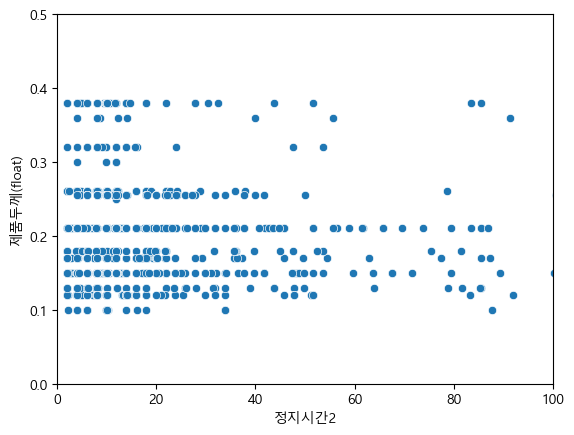

In [18]:
# 연속형 X - 연속형 Y
# 정지시간2 (오류가 조치될 때까지 걸린 시간) - '제품 두께(float)' 데이터 간 상관성 확인
plt.ylim([0, 0.5])
plt.xlim([0, 100])
sns.scatterplot(data=df1, x='정지시간2', y='제품두께(float)')

> **정규성 검정시**  
> 두 데이터 모두 정규 분포를 따른다면 **Pearson**  
> 두 데이터 중 하나라도 정규분포를 따르지 않는다면 **Speaeman**

In [25]:
# 연속형 데이터의 정규성 확인
stats.normaltest(df1['정지시간2'])

NormaltestResult(statistic=5927.964101196142, pvalue=0.0)

In [20]:
stats.normaltest(df1['제품두께(float)'])

NormaltestResult(statistic=nan, pvalue=nan)

In [21]:
# 결측값 제거 (dropna)
df2 = df1.dropna()

In [22]:
print(stats.normaltest(df2['정지시간2']))
print(stats.normaltest(df2['제품두께(float)']))

NormaltestResult(statistic=2637.000317993134, pvalue=0.0)
NormaltestResult(statistic=1178.6378565412642, pvalue=1.1535631411020227e-256)


In [24]:
# 제품 두께에 따른 오류 조치까지 걸린 시간이 서로 상관성이 있는가?
# 귀무 가설 : 제품 두께에 따른 오류 조치까지 걸린 시간이 서로 상관성이 없다.
# 대립 가설 : 제품 두께에 따른 오류 조치까지 걸린 시간이 서로 상관성이 있다.
stats.spearmanr(df2['정지시간2'], df2['제품두께(float)'])
# P-value > 0.05 | 귀무가설 참 | 두 연속형 자료는 서로 상관성이 없다.

SpearmanrResult(correlation=-0.057028965857508426, pvalue=0.05728442702442981)